# 2018년 대한민국 인구증가율과 노령인구비율

In [1]:
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51,12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

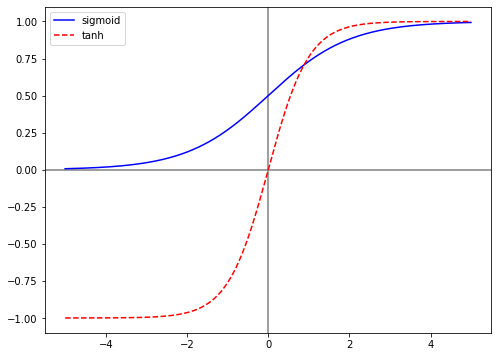

In [2]:
import matplotlib.pyplot as plt
import math
def sigmoid(x):
  return 1/ (1+ math.exp(-x))

x = np.arange(-5,5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.figure(figsize=(8,6))

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

In [3]:
import tensorflow as tf

model = tf.keras.Sequential([
      tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
      tf.keras.layers.Dense(units=1)
])
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X,Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 255.1238
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 115.6492
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 10.2758
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5846
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5423
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5248
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5074
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4887
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4687
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 9.4471


In [5]:
model.predict(X)

array([[15.852743],
       [15.691945],
       [15.267446],
       [15.913871],
       [15.380722],
       [15.871791],
       [15.907767],
       [15.848021],
       [15.698255],
       [15.880084],
       [15.645506],
       [15.868368],
       [15.902801],
       [15.914875],
       [15.704485],
       [13.996516]], dtype=float32)

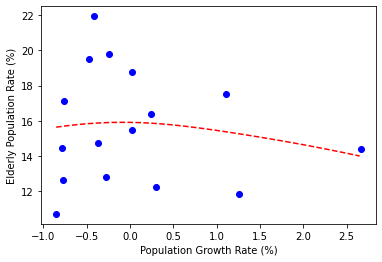

In [6]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y, 'r--')
plt.plot(X,Y,'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 케라스 모델 미사용 텐서플로 프로그래밍

In [10]:
a = tf.Variable(tf.random.uniform([1],0,1))
b = tf.Variable(tf.random.uniform([1],0,1))

def compute_loss():
  y_pred = a* X + b
  loss = tf.reduce_mean((Y-y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i,'a:', a.numpy(), 'b:',b.numpy(),'loss:', compute_loss().numpy())

99 a: [0.09295061] b: [7.2987556] loss: 79.6846
199 a: [-0.1422591] b: [11.666492] loss: 25.766249
299 a: [-0.27227935] b: [14.1031065] loss: 12.228132
399 a: [-0.3294682] b: [15.175087] loss: 10.024502
499 a: [-0.34915766] b: [15.544168] loss: 9.79643
599 a: [-0.354485] b: [15.644027] loss: 9.781441
699 a: [-0.35561872] b: [15.665279] loss: 9.780821
799 a: [-0.35580763] b: [15.668818] loss: 9.780805
899 a: [-0.35583135] b: [15.6692705] loss: 9.780803
999 a: [-0.35583326] b: [15.669303] loss: 9.780805


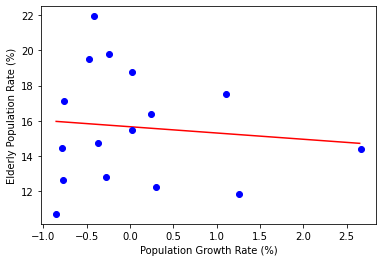

In [13]:
lline_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

plt.plot(line_x,line_y, 'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 보스톤 주택 가격 예측

In [15]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, train_Y.shape)
print(train_X[0])
print(train_Y[0])

(404, 13) (404,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [16]:
#정규화
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [17]:
#딥러닝 모델
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=52, activation='relu',input_shape=(13,)),
        tf.keras.layers.Dense(units=39, activation='relu'),
        tf.keras.layers.Dense(units=26, activation='relu'),
        tf.keras.layers.Dense(units=1)

])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [18]:
#학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 16ms/step - loss: 1.5559 - val_loss: 1.2979
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.4214 - val_loss: 0.5181
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2929 - val_loss: 0.4264
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2365 - val_loss: 0.3665
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2340 - val_loss: 0.4728
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3101 - val_loss: 0.2799
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2230 - val_loss: 0.3506
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2274 - val_loss: 0.3236
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.2635 - val_loss: 0.3152
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2371 - val_loss: 0.2316
Epoch 11/25
10/10 

In [19]:
#평가
model.evaluate(test_X,test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.2359


0.2358555644750595

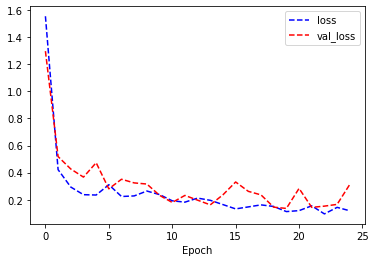

In [20]:
#훈련과정 시각화
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

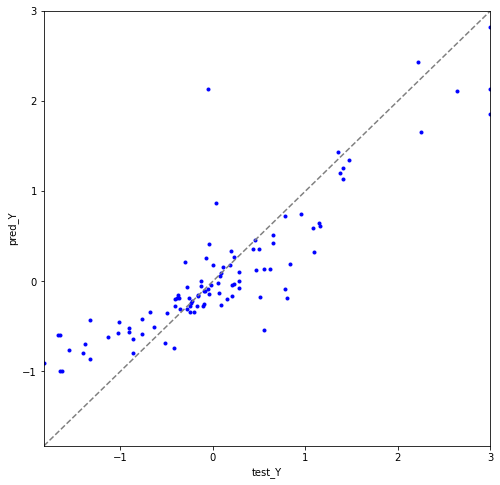

In [21]:
#예측 시각화
pred_Y = model.predict(test_X)
plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

In [22]:
#콜백함수
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1434 - val_loss: 0.2337
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1516 - val_loss: 0.2014
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1260 - val_loss: 0.2536
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1305 - val_loss: 0.1888
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1089 - val_loss: 0.1675
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1122 - val_loss: 0.1900
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1043 - val_loss: 0.2007
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1050 - val_loss: 0.1756


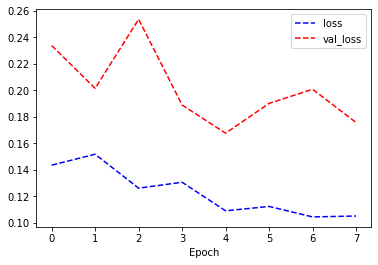

In [23]:
#자동 중단 시각화
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()